In [1]:
# import the libraries needed

import pandas as pd
import sqlite3

In [2]:
# connect to database

conn = sqlite3.connect('../data/prod_sample.db')

In [3]:
conn

In [4]:
# identify tables in database

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('stock_description',), ('online_retail_history',)]


In [5]:
# query to identify number of customers per country

query = """select *
          from online_retail_history
        """

# save as a DataFrame
online_retail_history = pd.read_sql(query, conn)


In [6]:
# head previews the first N rows of the DataFrame

online_retail_history.head() 


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom


In [8]:
# what is the shape of the data i.e. how many rows and how many columns does online_retail_history have

online_retail_history.shape

(541910, 7)

In [7]:
# question: what are the different data types of the variables
# can use python to solve this

online_retail_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Quantity     541910 non-null  int64  
 3   InvoiceDate  541910 non-null  object 
 4   Price        541910 non-null  float64
 5   CustomerID   406830 non-null  object 
 6   Country      541910 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ MB


In [43]:

# fix the date field
online_history_cleaned = online_retail_history.copy()
online_history_cleaned['InvoiceDate'] = pd.to_datetime(online_retail_history['InvoiceDate'], format='%Y-%m-%d')

# check info to see the format
online_history_cleaned_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Quantity     406830 non-null  int64         
 3   InvoiceDate  406830 non-null  datetime64[ns]
 4   Price        406830 non-null  float64       
 5   CustomerID   406830 non-null  object        
 6   Country      406830 non-null  object        
 7   Year         406830 non-null  int64         
 8   Month        406830 non-null  int64         
 9   DayOfWeek    406830 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 34.1+ MB


In [9]:
# how much missing data does the table contain?
# in sql we would have to go through each column

query = """select count(*)
          from online_retail_history
          where invoice is null
        """

pd.read_sql(query, conn)



,count(*)
0,0


In [48]:
# we use this handy bit of python code that aggregates how much missing data each column has

online_retail_history_cleaned.isnull().sum()

Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [11]:
# remove missing data
# option 1 - use sql


query = """select *
          from online_retail_history
          where CustomerID is not null
        """

online_retail_history_cleaned = pd.read_sql(query, conn)


In [12]:
# check the shape of the cleaned data
print("Shape of data before removal:", online_retail_history.shape)
print("Shape of data after removal:", online_retail_history_cleaned.shape)

Shape of data before removal: (541910, 7)
Shape of data after removal: (406830, 7)


In [13]:
# option 2 - use python
# subset the dataframe with a condition

online_retail_history_cleaned = online_retail_history[~online_retail_history.CustomerID.isnull()]
online_retail_history_cleaned

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom
...,...,...,...,...,...,...,...
541905,581587,22899,6,2011-12-09 12:50:00,2.10,u1268,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,u1268,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,u1268,France
541908,581587,22138,3,2011-12-09 12:50:00,4.95,u1268,France


In [14]:
# check the shape of the cleaned data
print("Shape of data before removal:", online_retail_history.shape)
print("Shape of data after removal:", online_retail_history_cleaned.shape)

Shape of data before removal: (541910, 7)
Shape of data after removal: (406830, 7)


In [15]:
# how many orders have been placed i.e. the distinct number of invoices

print("number of distinct invoices:", len(online_retail_history_cleaned.Invoice.unique()))

number of distinct invoices: 22190


In [49]:
# what is the distribution of customers

online_retail_history_cleaned.Country.value_counts().nlargest(10)

United Kingdom    361878
Germany             9495
France              8492
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
Name: Country, dtype: int64

In [17]:
# what is the min, max and average values of items sold?
# can use the describe function for a specific variable

print("maximum price", round(online_retail_history_cleaned.Price.max(), 2))
print("minimum price", round(online_retail_history_cleaned.Price.min(), 2))
print("average price", round(online_retail_history_cleaned.Price.mean(), 2))



maximum price 38970.0
minimum price 0.0
average price 3.46


In [18]:
# can use the describe function that gives summary statistics for all the numerical data

online_retail_history_cleaned.describe()

,Quantity,Price
count,406830.000000,406830.000000
mean,12.061276,3.460507
std,248.693065,69.315080
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [19]:
# max price of items sold in Germany

online_retail_history_cleaned[online_retail_history_cleaned.Country == "Germany"].Price.max()

599.5

In [20]:
# min price of items sold in Germany

online_retail_history_cleaned[online_retail_history_cleaned.Country == "Germany"].Price.min()

0.0

In [21]:
# what is the most expensive items sold in Germany

max_price_germany = online_retail_history_cleaned[online_retail_history_cleaned.Country == "Germany"].Price.max()

list(online_retail_history_cleaned[(online_retail_history_cleaned.Country == "Germany") &
                             (online_retail_history_cleaned.Price == max_price_germany)]["StockCode"].unique())[0]

'M'

In [22]:
# which country has the highest average price of items sold

online_retail_history_cleaned.groupby(["Country"])["Price"].mean().sort_values(ascending = False).nlargest(1)

Country
Singapore    109.645808
Name: Price, dtype: float64

In [44]:
# Most popular product by country

# step 1. join the tables together

query = """select *
           from online_retail_history as t1
           join stock_description as t2 on t1.StockCode = t2.StockCode
           where CustomerID is not null 
            and Description <> '?'
"""

online_retail_history_w_desc = pd.read_sql(query, conn)
online_retail_history_w_desc.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,StockCode,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,85123A,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,71053,WHITE MOROCCAN METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.


In [45]:
# shape of data

online_retail_history_w_desc.shape

(405085, 9)

In [46]:
# structure of data

online_retail_history_w_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405085 entries, 0 to 405084
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      405085 non-null  object 
 1   StockCode    405085 non-null  object 
 2   Quantity     405085 non-null  int64  
 3   InvoiceDate  405085 non-null  object 
 4   Price        405085 non-null  float64
 5   CustomerID   405085 non-null  object 
 6   Country      405085 non-null  object 
 7   StockCode    405085 non-null  object 
 8   Description  405085 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 27.8+ MB


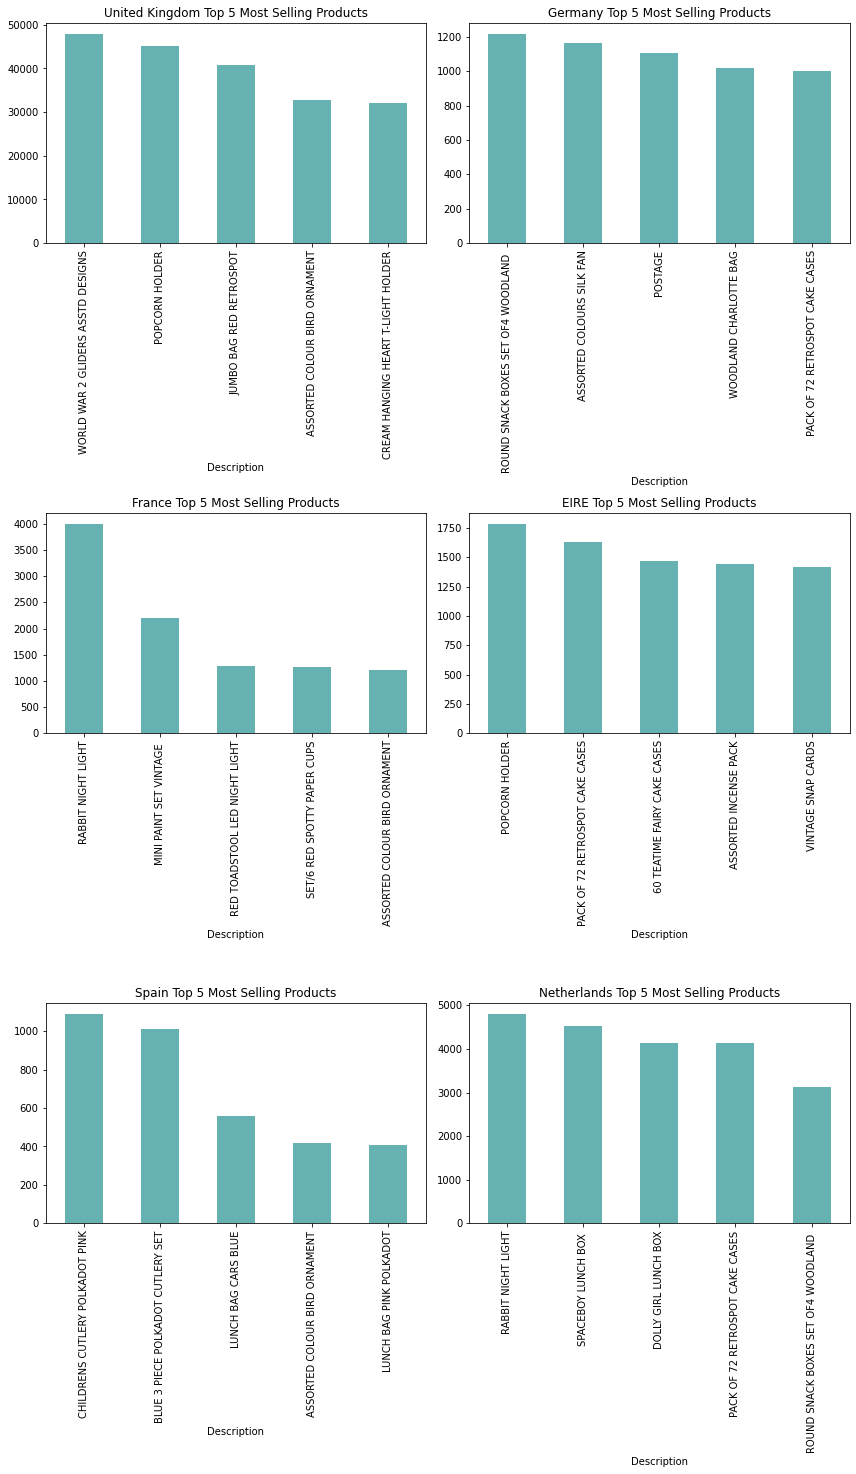

In [47]:
import matplotlib.pyplot as plt

countries_of_interest = ["United Kingdom", "Germany", "France", "EIRE", "Spain", "Netherlands"] # list of countries interested in
temp = pd.DataFrame(online_retail_history_w_desc.groupby(["Country", "Description"]).sum()["Quantity"])

x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(countries_of_interest):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(c + ' '+ "Top 5 Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()